## Healthiest City

Data source: Healthy Lifestyle Cities Report 2021 from https://www.lenstore.co.uk/research/healthy-lifestyle-report/

Research Topic:

What does it mean to be the healthiest city?

Research questions:
1. Can cities with a high average of hours worked be healthy?
2. Do cities with more sunshine have more outdoor activities resulting in a healthier city?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import thinkstats2
import thinkplot
from empiricaldist import Pmf
from empiricaldist import Cdf
import scipy.stats

pd.options.display.float_format = '{:.5f}'.format

In [2]:
healthy_df = pd.read_csv('healthy_lifestyle_city_2021.csv')

healthy_df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.20000,30.93,1434,7.44000,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.10000,26.86,1712,7.22000,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.00000,17.33,1501,7.29000,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.80000,19.63,1452,7.35000,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.80000,21.24,1380,7.64000,154,523,£32.53


In [3]:
# Shape
healthy_df.shape

(44, 12)

In [4]:
# Data Types
healthy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


## Data Cleaning

Sunshine hours, Cost of a bottle of water, Obesity levels, Pollution, Annual Hours Worked, and  
Cost of Monthly Gym Membership need to be converted to numeric

In [5]:
# Convert Cost of a bottle of water to US Dollars
rate_of_exchange = 1.31
df = dict()

df['Amount'] = healthy_df['Cost of a bottle of water(City)'].str[1:]
healthy_df['Cost of a bottle of water(City)'] = pd.to_numeric(df['Amount']) * rate_of_exchange
healthy_df['Cost of a bottle of water(City)'].head()

0   2.51520
1   1.93880
2   2.54140
3   2.25320
4   2.86890
Name: Cost of a bottle of water(City), dtype: float64

In [6]:
# Convert Cost of a monthly gym membership to US Dollars
rate_of_exchange = 1.31

df['Amount'] = healthy_df['Cost of a monthly gym membership(City)'].str[1:]
healthy_df['Cost of a monthly gym membership(City)'] = pd.to_numeric(df['Amount']) * rate_of_exchange
healthy_df['Cost of a monthly gym membership(City)'].head()

0   45.71900
1   54.57460
2   33.71940
3   48.87610
4   42.61430
Name: Cost of a monthly gym membership(City), dtype: float64

In [7]:
# Convert Obesity levels(Country) to float removing '%'
df['Obesity'] = healthy_df['Obesity levels(Country)'].str.replace("%", "")
healthy_df['Obesity levels(Country)'] = pd.to_numeric(df['Obesity'])
healthy_df['Obesity levels(Country)'].head()

0   20.40000
1   29.00000
2   20.10000
3   20.60000
4   19.70000
Name: Obesity levels(Country), dtype: float64

In [8]:
# Convert Sunshine Hours, Pollution, Annual avg. hours worked to numeric
healthy_df['Sunshine hours(City)'] = pd.to_numeric(healthy_df['Sunshine hours(City)'], errors = 'coerce', 
                                                   downcast = 'integer').fillna(0)
healthy_df['Pollution(Index score) (City)'] = pd.to_numeric(healthy_df['Pollution(Index score) (City)'], 
                                                            errors = 'coerce').fillna(0.0)
healthy_df['Annual avg. hours worked'] = pd.to_numeric(healthy_df['Annual avg. hours worked'], 
                                                        errors = 'coerce', downcast = 'integer').fillna(0)

healthy_df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.00000,2.51520,20.40000,81.20000,30.93000,1434.00000,7.44000,422,1048,45.71900
1,Sydney,2,2636.00000,1.93880,29.00000,82.10000,26.86000,1712.00000,7.22000,406,1103,54.57460
2,Vienna,3,1884.00000,2.54140,20.10000,81.00000,17.33000,1501.00000,7.29000,132,1008,33.71940
3,Stockholm,4,1821.00000,2.25320,20.60000,81.80000,19.63000,1452.00000,7.35000,129,598,48.87610
4,Copenhagen,5,1630.00000,2.86890,19.70000,79.80000,21.24000,1380.00000,7.64000,154,523,42.61430


In [9]:
# Convert Hours of Sunshine per year to hours per day
healthy_df["SunshinePerDay"] = round(healthy_df["Sunshine hours(City)"] /  360)

# Convert Annual Average hours Worked to hours per day
healthy_df["WorkPerDay"] = round(healthy_df["Annual avg. hours worked"] /  360)
healthy_df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),SunshinePerDay,WorkPerDay
0,Amsterdam,1,1858.00000,2.51520,20.40000,81.20000,30.93000,1434.00000,7.44000,422,1048,45.71900,5.00000,4.00000
1,Sydney,2,2636.00000,1.93880,29.00000,82.10000,26.86000,1712.00000,7.22000,406,1103,54.57460,7.00000,5.00000
2,Vienna,3,1884.00000,2.54140,20.10000,81.00000,17.33000,1501.00000,7.29000,132,1008,33.71940,5.00000,4.00000
3,Stockholm,4,1821.00000,2.25320,20.60000,81.80000,19.63000,1452.00000,7.35000,129,598,48.87610,5.00000,4.00000
4,Copenhagen,5,1630.00000,2.86890,19.70000,79.80000,21.24000,1380.00000,7.64000,154,523,42.61430,5.00000,4.00000


In [10]:
# Save cleaned data to csv file for tableau
healthy_df.to_csv('healthy_lifestyles_cleaned.csv')

In [11]:
# With new variables
healthy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     float64
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     float64
 7   Annual avg. hours worked                44 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


## 5 Variables for Analysis

1. SunshinePerDay: Daily Sunshine hours(City)
2. Obesity levels per Country: Obesity levels(Country)
3. Cost of a bottle of water (US $): Cost of a bottle of water(City)
4. Number of Outdoor Activities: Outdoor activities(City)
5. WorkPerDay: Daily avg. hours worked

In [12]:
healthy_df[['SunshinePerDay', 'Cost of a bottle of water(City)', 
            'Obesity levels(Country)', 'WorkPerDay', 'Outdoor activities(City)']].head()

,SunshinePerDay,Cost of a bottle of water(City),Obesity levels(Country),WorkPerDay,Outdoor activities(City)
0,5.00000,2.51520,20.40000,4.00000,422
1,7.00000,1.93880,29.00000,5.00000,406
2,5.00000,2.54140,20.10000,4.00000,132
3,5.00000,2.25320,20.60000,4.00000,129
4,5.00000,2.86890,19.70000,4.00000,154


## EDA

In [13]:
def findOutliers_IQR(df):
    '''
    Find Outliers in the dataframe
    
    args:
        df (dataframe)
        
    return:
        outliers (dataframe)
    '''
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = df[((df <= lower_bound) | (df >= upper_bound))]
    
    return outliers

## Histogram and outliers of each of the 5 variables and how to deal with the outliers

### Daily Hours of Sunshine Analysis

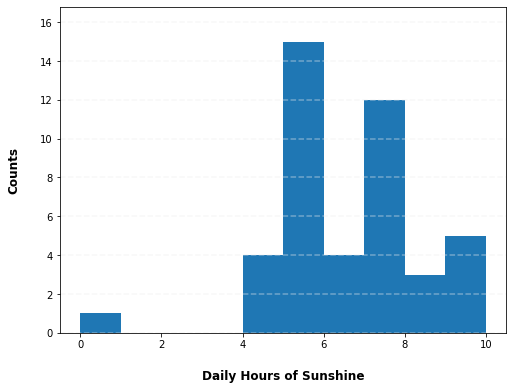

In [14]:

# Histogram
hoursSunshine_hist = healthy_df.hist(column = 'SunshinePerDay', figsize = (8,6), grid = False)

hoursSunshine_hist = hoursSunshine_hist[0]
for x in hoursSunshine_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Daily Hours of Sunshine", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

plt.show()

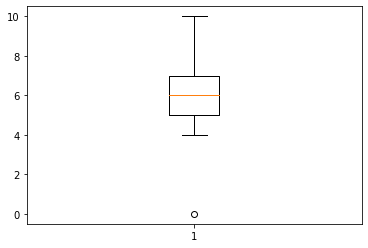

<Figure size 720x504 with 0 Axes>

In [15]:
# Boxplot
plt.boxplot(healthy_df['SunshinePerDay'])
fig = plt.figure(figsize = (10, 7))
plt.show()

In [16]:
print(f"Mean: {healthy_df['SunshinePerDay'].mean()}")
print(f"Median: {healthy_df['SunshinePerDay'].median()}")
print(f"Mode: {healthy_df['SunshinePerDay'].mode()}")

Mean: 6.113636363636363
Median: 6.0
Mode: 0   5.00000
Name: SunshinePerDay, dtype: float64


In [17]:
healthy_df['SunshinePerDay'].describe(include='all')

count   44.00000
mean     6.11364
std      1.81999
min      0.00000
25%      5.00000
50%      6.00000
75%      7.00000
max     10.00000
Name: SunshinePerDay, dtype: float64

In [18]:
outliers = findOutliers_IQR(healthy_df['SunshinePerDay'])
print(f"Number of outliers for Sunshine hours: {str(len(outliers))}")
print(f"Max outlier for Sunshine hours: {str(outliers.max())}")
print(f"Min outlier for Sunshine hours: {str(outliers.min())}")

print(f"Outliers are: \n{outliers}")

Number of outliers for Sunshine hours: 2
Max outlier for Sunshine hours: 10.0
Min outlier for Sunshine hours: 0.0
Outliers are: 
19    0.00000
22   10.00000
Name: SunshinePerDay, dtype: float64


The spread is from the minimum to the maximum which is 10 hrs
Since the mean and median are the same there are no tails

*The outlier in this column is 0. As no city has 0 hours of sunshine per year I believe this to be a typo and
the outlier should be removed from the data. A city can have 10 hours of sunshine so this piece of data should stay*

### Obsesity Levels per Country Analysis

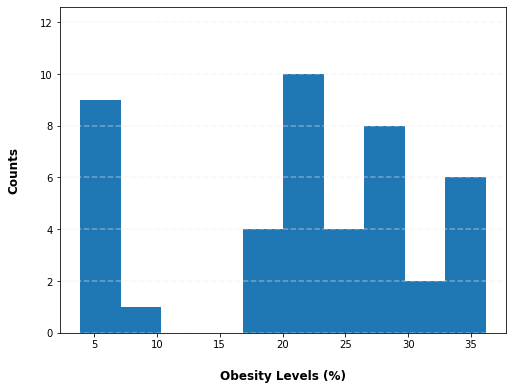

In [19]:
# Obesity levels per Country
obesityLevel_hist = healthy_df.hist(column = 'Obesity levels(Country)', figsize = (8,6), grid = False)

obesityLevel_hist = obesityLevel_hist[0]
for x in obesityLevel_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Obesity Levels (%)", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

plt.show()

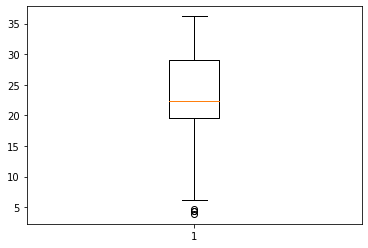

<Figure size 720x504 with 0 Axes>

In [20]:
# Boxplot of Obesity levels per Country
plt.boxplot(healthy_df['Obesity levels(Country)'])
fig = plt.figure(figsize = (10, 7))
plt.show()

In [21]:
print(f"Mean: {healthy_df['Obesity levels(Country)'].mean()}")
print(f"Median: {healthy_df['Obesity levels(Country)'].median()}")
print(f"Mode: {healthy_df['Obesity levels(Country)'].mode()}")

Mean: 21.925000000000004
Median: 22.3
Mode: 0   36.20000
Name: Obesity levels(Country), dtype: float64


In [22]:
healthy_df['Obesity levels(Country)'].describe()

count   44.00000
mean    21.92500
std     10.19567
min      3.90000
25%     19.50000
50%     22.30000
75%     29.00000
max     36.20000
Name: Obesity levels(Country), dtype: float64

In [23]:
outliers = findOutliers_IQR(healthy_df['Obesity levels(Country)'])
print(f"Number of outliers for Obesity Levels: {str(len(outliers))}")
print(f"Max outlier for Obesity Levels: {str(outliers.max())}")
print(f"Min outlier for Obesity Levels: {str(outliers.min())}")
print(f"Outliers are: \n{outliers}")

Number of outliers for Obesity Levels: 4
Max outlier for Obesity Levels: 4.7
Min outlier for Obesity Levels: 3.9
Outliers are: 
6    4.30000
17   4.70000
25   3.90000
28   4.30000
Name: Obesity levels(Country), dtype: float64


*There are 4 outliers in this column and because there can be very small obesity levels in people, these
should stay in the dataset*

### Cost of a bottle of water Analysis

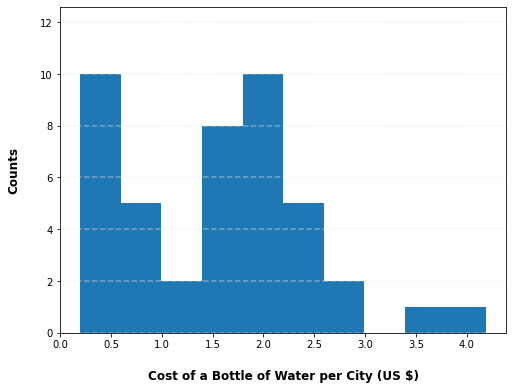

In [24]:
# Cost of a bottle of water per City
waterCost_hist = healthy_df.hist(column = 'Cost of a bottle of water(City)', figsize = (8,6), grid = False)

waterCost_hist = waterCost_hist[0]
for x in waterCost_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Cost of a Bottle of Water per City (US $)", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

plt.show()

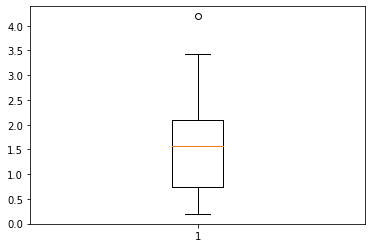

<Figure size 720x504 with 0 Axes>

In [25]:
# Boxplot of Life Expectancy
plt.boxplot(healthy_df['Cost of a bottle of water(City)'])
fig = plt.figure(figsize = (10, 7))
plt.show()

In [26]:
print(f"Mean: {healthy_df['Cost of a bottle of water(City)'].mean()}")
print(f"Median: {healthy_df['Cost of a bottle of water(City)'].median()}")
print(f"Mode: \n{healthy_df['Cost of a bottle of water(City)'].mode()}")

Mean: 1.5371659090909093
Median: 1.56545
Mode: 
0   0.19650
1   0.74670
2   0.77290
3   2.09600
4   2.55450
Name: Cost of a bottle of water(City), dtype: float64


In [27]:
healthy_df['Cost of a bottle of water(City)'].describe()

count   44.00000
mean     1.53717
std      0.94142
min      0.19650
25%      0.74670
50%      1.56545
75%      2.09600
max      4.19200
Name: Cost of a bottle of water(City), dtype: float64

In [28]:
outliers = findOutliers_IQR(healthy_df['Cost of a bottle of water(City)'])
print(f"Number of outliers for water cost: {str(len(outliers))}")
print(f"Max outlier for water cost: {str(outliers.max())}")
print(f"Min outlier for water cost: {str(outliers.min())}")
print(f"Outliers are: \n{outliers}")

Number of outliers for water cost: 1
Max outlier for water cost: 4.192
Min outlier for water cost: 4.192
Outliers are: 
36   4.19200
Name: Cost of a bottle of water(City), dtype: float64


*There is one outlier of $4.19 for a bottle of water. Since the mean is $1.52 I this we can be safe to remove this
outlier and just a very expensive city*

### Outdoor activities(City) Analysis

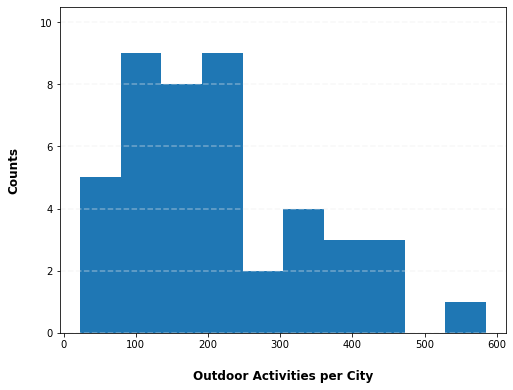

In [29]:
# histogram
outdoor_hist = healthy_df.hist(column = 'Outdoor activities(City)', figsize = (8,6), grid = False)

outdoor_hist = outdoor_hist[0]
for x in outdoor_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Outdoor Activities per City", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

plt.show()

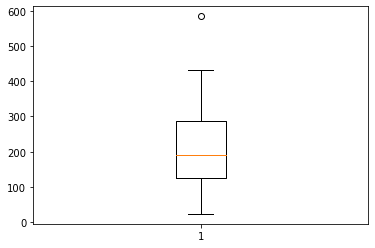

<Figure size 720x504 with 0 Axes>

In [30]:
# Boxplot
plt.boxplot(healthy_df['Outdoor activities(City)'])
fig = plt.figure(figsize = (10, 7))
plt.show()

In [31]:
print(f"Mean: {healthy_df['Outdoor activities(City)'].mean()}")
print(f"Median: {healthy_df['Outdoor activities(City)'].median()}")
print(f"Mode: {healthy_df['Outdoor activities(City)'].mode()}")

Mean: 213.97727272727272
Median: 189.5
Mode: 0    223
Name: Outdoor activities(City), dtype: int64


In [32]:
healthy_df['Outdoor activities(City)'].describe()

count    44.00000
mean    213.97727
std     127.19030
min      23.00000
25%     125.25000
50%     189.50000
75%     288.25000
max     585.00000
Name: Outdoor activities(City), dtype: float64

In [33]:
outliers = findOutliers_IQR(healthy_df['Outdoor activities(City)'])
print(f"Number of outliers for outdoor activities: {str(len(outliers))}")
print(f"Max outlier for outdoor activities: {str(outliers.max())}")
print(f"Min outlier for outdoor activities: {str(outliers.min())}")
print(f"Outliers are: \n{outliers}")

Number of outliers for outdoor activities: 1
Max outlier for outdoor activities: 585
Min outlier for outdoor activities: 585
Outliers are: 
8    585
Name: Outdoor activities(City), dtype: int64


*There are 1 outlier having a whopping 585 number of outdoor activites.  As the mean is 214, I think we can safely remove this one city*

### Daily Average houred Worked Analysis

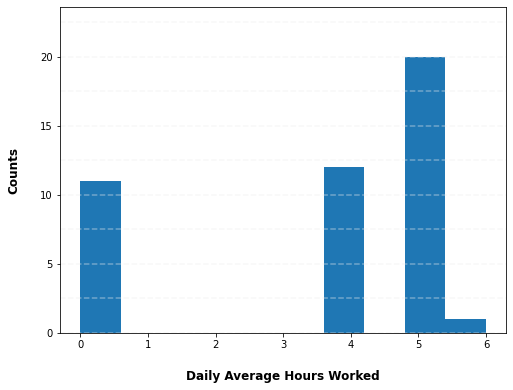

In [34]:
# Histogram
hoursWorked_hist = healthy_df.hist(column = 'WorkPerDay', figsize = (8,6), grid = False)

hoursWorked_hist = hoursWorked_hist[0]
for x in hoursWorked_hist:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
        
    # Remove title
    x.set_title("")
    
    # Set X-axis label
    x.set_xlabel("Daily Average Hours Worked", labelpad=20, weight='bold', size=12)
    
    # Set Y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

plt.show()

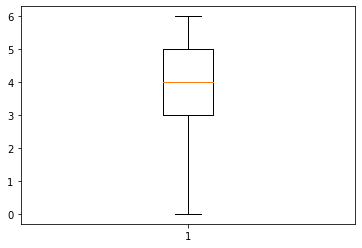

<Figure size 720x504 with 0 Axes>

In [35]:
# Boxplot
plt.boxplot(healthy_df['WorkPerDay'])
fig = plt.figure(figsize = (10, 7))
plt.show()

In [36]:
print(f"Mean: {healthy_df['WorkPerDay'].mean()}")
print(f"Median: {healthy_df['WorkPerDay'].median()}")
print(f"Mode: {healthy_df['WorkPerDay'].mode()}")

Mean: 3.5
Median: 4.0
Mode: 0   5.00000
Name: WorkPerDay, dtype: float64


In [37]:
healthy_df['WorkPerDay'].describe(include  = 'all')

count   44.00000
mean     3.50000
std      2.09651
min      0.00000
25%      3.00000
50%      4.00000
75%      5.00000
max      6.00000
Name: WorkPerDay, dtype: float64

In [38]:
outliers = findOutliers_IQR(healthy_df['WorkPerDay'])
print(f"Number of outliers for Avg Hours Worked: {str(len(outliers))}")
print(f"Max outlier for Avg Hours Worked: {str(outliers.max())}")
print(f"Min outlier for Avg Hours Worked: {str(outliers.min())}")
print(f"Outliers are: \n{outliers}")

Number of outliers for Avg Hours Worked: 11
Max outlier for Avg Hours Worked: 0.0
Min outlier for Avg Hours Worked: 0.0
Outliers are: 
11   0.00000
12   0.00000
13   0.00000
16   0.00000
22   0.00000
23   0.00000
25   0.00000
30   0.00000
31   0.00000
35   0.00000
38   0.00000
Name: WorkPerDay, dtype: float64


*A lot of the cities has 0 daily hours of work but since this is an average this needs to stay in the dataset*

## Compare Two Scenarios using a PMF for the Same Variable

In [39]:
### Compare Obesity Levels from the number of hours per day of Sunshine

In [40]:
# Get the unique values of the number of hours
healthy_df["SunshinePerDay"].value_counts().sort_index()

0.00000      1
4.00000      4
5.00000     15
6.00000      4
7.00000     12
8.00000      3
9.00000      4
10.00000     1
Name: SunshinePerDay, dtype: int64

### Compare the highest frequency of 5 hours compares to the rest for obesity levels

In [41]:
# Create df for 5 hours of sunshine and non 5 hours of sunshine
obesity_hours5 = healthy_df[healthy_df.SunshinePerDay == 5]
print(obesity_hours5['Obesity levels(Country)'].value_counts().sort_index())

obesity_rest = healthy_df[healthy_df.SunshinePerDay != 5]
print(obesity_rest['Obesity levels(Country)'].value_counts().sort_index())

4.30000     1
6.20000     2
19.70000    1
19.90000    1
20.10000    1
20.40000    1
20.60000    1
21.60000    1
22.20000    1
22.30000    2
23.10000    1
27.80000    1
29.40000    1
Name: Obesity levels(Country), dtype: int64
3.90000     1
4.30000     1
4.70000     1
6.20000     2
6.90000     1
10.00000    1
19.50000    2
22.10000    2
23.80000    2
25.30000    1
26.10000    1
28.30000    2
28.90000    1
29.00000    2
29.40000    1
32.00000    1
32.10000    1
36.20000    6
Name: Obesity levels(Country), dtype: int64


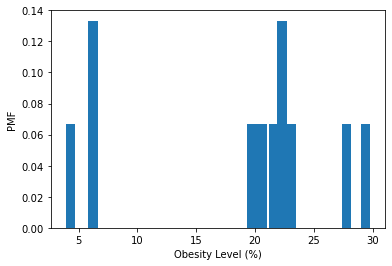

In [42]:
# Plot the PMF levels of 5 hours of Sunshine
obesity_5hrs_pmf = Pmf.from_seq(obesity_hours5['Obesity levels(Country)'])
plt.xlabel("Obesity Level (%)")
plt.ylabel("PMF")
obesity_5hrs_pmf.bar()

Mean obesity of 5 hours of Sunshine: 19.07333333333333
Mean obesity of Rest of Sunshine: 23.400000000000002


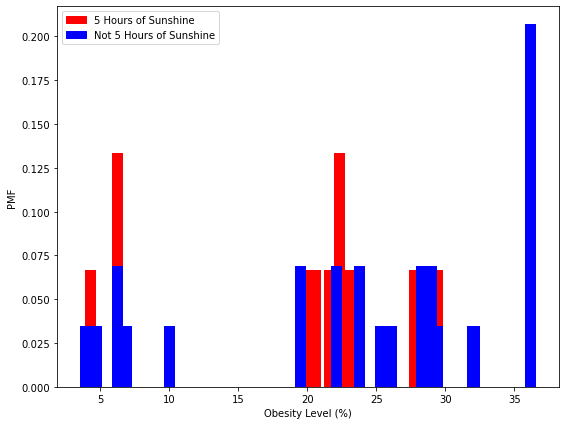

In [43]:
# Compare the PMF of Obesity Level in 5 hours vs the rest
obesity_5hrs_pmf = Pmf.from_seq(obesity_hours5['Obesity levels(Country)'])
obesity_rest_pmf = Pmf.from_seq(obesity_rest['Obesity levels(Country)'])

fig, ax = plt.subplots(1, 1, figsize = (9, 7))

fiveHours = mpatches.Patch(color='red', label='5 Hours of Sunshine')
rest = mpatches.Patch(color='blue', label='Not 5 Hours of Sunshine')
ax.legend(handles=[fiveHours, rest ], )

plt.xlabel("Obesity Level (%)")
plt.ylabel("PMF")

obesity_5hrs_pmf.bar(color=['red'])
obesity_rest_pmf.bar(color=['blue'])

# Save figure for powerpoint
plt.savefig('Obesity Levels per Hours of Sunshine.png')

print(f"Mean obesity of 5 hours of Sunshine: {obesity_5hrs_pmf.mean()}")
print(f"Mean obesity of Rest of Sunshine: {obesity_rest_pmf.mean()}")

*With 5 hours of sunshine the obesity levels are much lower than any other amount of sunshine per day*

### Create 1 CDF with one of your variables

In [44]:
# Cost of a bottle of water(City)
waterCost_cdf = Cdf.from_seq(healthy_df['Cost of a bottle of water(City)'])
waterCost_cdf.head()

,probs
0.19650,0.04545
0.20960,0.06818
0.27510,0.09091


Cost of a Bottle of Water at Probability of 50%: $1.5589


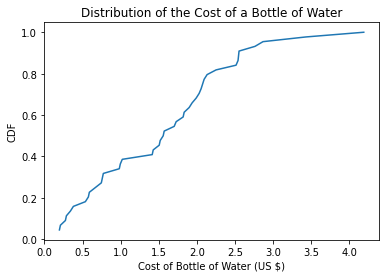

In [45]:
waterCost_cdf.plot()
plt.xlabel('Cost of Bottle of Water (US $)')
plt.ylabel('CDF')
plt.title('Distribution of the Cost of a Bottle of Water')

print(f"Cost of a Bottle of Water at Probability of 50%: ${waterCost_cdf.inverse(0.5)}")

### What does this tell you about your variable and now does it address the question you are trying to answer

Looking at the CDF plot, the average cost of a bottle of water is \\$1.56. Most cities charge a different value for their water and it seems to top off around \\$2.50.

### Analytical Distribution and provide analysis on how it applies to the dataset

In [46]:
# Obesity levels(Country)
# Normal Probablity Plot

((array([-2.15374952, -1.77530174, -1.55088744, -1.38514138, -1.25057432,
         -1.1354892 , -1.03375442, -0.94172868, -0.85705923, -0.7781294 ,
         -0.70377435, -0.63312213, -0.5654989 , -0.50036931, -0.43729746,
         -0.3759202 , -0.31592847, -0.25705362, -0.19905725, -0.14172333,
         -0.08485191, -0.02825382,  0.02825382,  0.08485191,  0.14172333,
          0.19905725,  0.25705362,  0.31592847,  0.3759202 ,  0.43729746,
          0.50036931,  0.5654989 ,  0.63312213,  0.70377435,  0.7781294 ,
          0.85705923,  0.94172868,  1.03375442,  1.1354892 ,  1.25057432,
          1.38514138,  1.55088744,  1.77530174,  2.15374952]),
  array([ 3.9,  4.3,  4.3,  4.7,  6.2,  6.2,  6.2,  6.2,  6.9, 10. , 19.5,
         19.5, 19.7, 19.9, 20.1, 20.4, 20.6, 21.6, 22.1, 22.1, 22.2, 22.3,
         22.3, 23.1, 23.8, 23.8, 25.3, 26.1, 27.8, 28.3, 28.3, 28.9, 29. ,
         29. , 29.4, 29.4, 32. , 32.1, 36.2, 36.2, 36.2, 36.2, 36.2, 36.2])),
 (10.055308561879002, 21.925000000000008, 

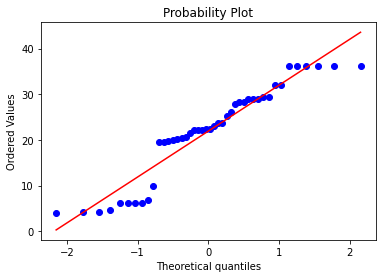

In [47]:
scipy.stats.probplot(healthy_df['Obesity levels(Country)'], dist="norm", plot = plt)

The probablity plot suggests that the distribution of Obesity weights does not really follow a normal distribution.

## Create 2 scatterplots comparing two variables and provide analysis on correlation and causation

### Is the obesity levels in a city related to the number of hours of sunshine?

<AxesSubplot:xlabel='Obesity levels(Country)', ylabel='SunshinePerDay'>

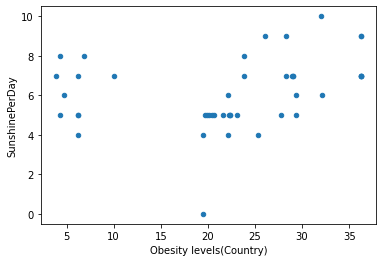

In [48]:
healthy_df.plot.scatter(x = 'Obesity levels(Country)', y = 'SunshinePerDay')

Looking at the scatterplot, it doesnt look like there is a correlation between obesity levels and the number of hours of sunshine per day a city has.

In [49]:
# Covariance of the population

healthy_covariance = np.cov(healthy_df['Obesity levels(Country)'], healthy_df['SunshinePerDay'], bias = True)[0][1]
healthy_covariance

5.076704545454547

The covariance is positive so the obesity levels and number of hours of sunshine are both moving in the same direction.

In [50]:
# Pearson's Correlation Coefficient

healthy_pearson = scipy.stats.pearsonr(healthy_df['Obesity levels(Country)'], healthy_df['SunshinePerDay'])
print(f"Pearsons: {healthy_pearson}")

Pearsons: (0.2799503789654266, 0.06569258137412595)


In [51]:
# Spearman's Correlation Coefficient

healthy_spearman = scipy.stats.spearmanr(healthy_df['Obesity levels(Country)'], healthy_df['SunshinePerDay'])
print(f"Spearmans: {healthy_spearman}")

Spearmans: SpearmanrResult(correlation=0.40740616681443814, pvalue=0.006054298219815343)


Spearman's coefficient is higher than Pearson's coefficent. This could be due to the outliers in both Obesity levels and Number of Hours of Sunshine.

### Is the number of outdoor activities related to the cost of a bottle of water?

<AxesSubplot:xlabel='Cost of a bottle of water(City)', ylabel='Outdoor activities(City)'>

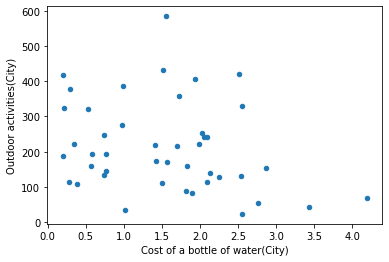

In [52]:
healthy_df.plot.scatter(x = 'Cost of a bottle of water(City)', y = 'Outdoor activities(City)')

In [53]:
# Covariance of the population

healthy_covariance = np.cov(healthy_df['Cost of a bottle of water(City)'], 
                            healthy_df['Outdoor activities(City)'], bias = True)[0][1]
healthy_covariance

-30.4594825929752

The covariance is -30.5 indicating that when the cost of a bottle of water goes down the number of outdoor activities also goes down.

In [54]:
# Pearson's Correlation Coefficient

healthy_pearson = scipy.stats.pearsonr(healthy_df['Cost of a bottle of water(City)'], 
                                       healthy_df['Outdoor activities(City)'])
print(f"Pearsons: {healthy_pearson}")

Pearsons: (-0.26029684476344606, 0.0879219059846264)


The Pearson's coefficient is -0.26 with a p-value of 0.09.  This indicates that there is most likely no correlation between the cost of a bottle of water and the number of activities a city has.

In [55]:
# Spearman's Correlation Coefficient

healthy_spearman = scipy.stats.spearmanr(healthy_df['Cost of a bottle of water(City)'], 
                                         healthy_df['Outdoor activities(City)'])
print(f"Spearmans: {healthy_spearman}")

Spearmans: SpearmanrResult(correlation=-0.2880101529993642, pvalue=0.05798196926875095)


Spearman's coefficient is -0.29 with a p-value of 0.08. This indicates that there is most likely no correlation between the cost of a bottle of water and the number of outdoor activities a city has.

### Conduct a test on your hypothesis

*Hypothesis: If the number of average hours worked decreased does the obesity levels also decrease in a healthy city?*

In [56]:
sunshine = healthy_df['SunshinePerDay']
obesity = healthy_df['Obesity levels(Country)']

In [58]:
corr = scipy.stats.pearsonr(obesity, sunshine)[0]
corr

0.2799503789654266

A correlation of 0.28 indicates a low positive correlation between number of hours of sunshine and obesity levels.

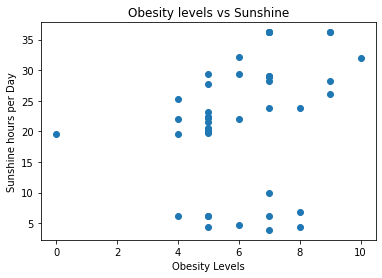

In [59]:
plt.scatter(sunshine, obesity)
plt.title('Obesity levels vs Sunshine')
plt.xlabel("Obesity Levels")
plt.ylabel("Sunshine hours per Day")
plt.show()

In [60]:
# hypothesis test
iters = 1000
shuffle = np.array(obesity)
count = 0

for _ in range(iters):
    np.random.shuffle(shuffle)
    new_corr = scipy.stats.pearsonr(shuffle, sunshine)[0]
    
    if new_corr > corr:
        count += 1
        
print(f"p-value: {count / iters}")

p-value: 0.039


A p-value of 0.39 shows that the null hypothesis is rejected and the test is significant.